## [Luis Alejandro Rodríguez Arenas](https://luigitoby.github.io/) y [Daniel Suaza](https://Azaus123.github.io/)
## Cod. 202321287  
# Quiz 1


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sympy import symbols, Matrix, pi, cos, sin, simplify, eye, solve, acos, asin,  latex, atan2, pprint, init_printing, Derivative, sqrt, rad
from sympy.physics.mechanics import ReferenceFrame, dynamicsymbols, init_vprinting, Point

# Configuración de impresión en formato LaTeX (MathJax)
init_vprinting(use_latex='mathjax')

In [2]:
# Para la animación
# pip install ipywidgets

# Ejercicio 1 - Dinámica directa para Escara 2D

In [3]:
# Variables simbólicas
theta1, theta2 = dynamicsymbols('theta1 theta2') # q1 y q2
L1, L2 = symbols('L1 L2') # a1 y a2

# Marcos de referencia, pero se usan dos por las dos uniones de los links
# Mi marco de referencia x-y
N = ReferenceFrame('N')
# Creo un nuevo marco de referencia con respecto a N, A_x-A_y. Depende de theta1
A = N.orientnew('A', 'Axis', [theta1, N.z])
# Creo un nuevo marco de referencia con respecto a A, B_y-B_x. Depende de theta2
B = A.orientnew('B', 'Axis', [theta2, A.z]) # Note que B lo definimos con respecto a A así no hay que pensar B en terminos de B

# Origen
O = Point('O')

P1 = O.locatenew('P1', L1 * A.x) # Existe un P1 en L1  por A_x
P2 = P1.locatenew('P2', L2 * B.x) # Existe un P2 en L2 con respecto a B_x

# Vector de posición del efector
vector_pos_efector = P2.pos_from(O).express(N).simplify()
print("\nVector de posición del efector (en marco N):")
display(vector_pos_efector)
# Hasta aca vamos bien


# Evaluación numérica de ejemplo
valores = {
    theta1: rad(90),
    theta2: rad(0),
    L1: 2,
    L2: 1
}

vector_numerico = vector_pos_efector.subs(valores).evalf()
x = vector_numerico.dot(N.x)
y = vector_numerico.dot(N.y)
print(f"\nPosición numérica del efector:\nx = {x:.4f}\ny = {y:.4f}")


Vector de posición del efector (en marco N):


(L₁⋅cos(θ₁) + L₂⋅cos(θ₁ + θ₂)) n_x + (L₁⋅sin(θ₁) + L₂⋅sin(θ₁ + θ₂)) n_y


Posición numérica del efector:
x = 0.0000
y = 3.0000


In [4]:
# Variables simbólicas
theta1, theta2 = dynamicsymbols('theta1 theta2') # q1 y q2
L1, L2 = symbols('L1 L2') # a1 y a2

# Marcos de referencia, pero se usan dos por las dos uniones de los links
# Mi marco de referencia x-y
N = ReferenceFrame('N')
# Creo un nuevo marco de referencia con respecto a N, A_x-A_y. Depende de theta1
A = N.orientnew('A', 'Axis', [theta1, N.z])
# Creo un nuevo marco de referencia con respecto a A, B_y-B_x. Depende de theta2
B = A.orientnew('B', 'Axis', [theta2, A.z]) # Note que B lo definimos con respecto a A así no hay que pensar B en terminos de B
P1 = L1 * A.x # Existe un P1 en L1  por A_x
P2 = L2 * B.x # Existe un P2 en L2 con respecto a B_x
P3 = P1+P2
vector_pos_efector = P3.express(N).simplify()
print("\nVector de posición del efector (en marco N):")
display(vector_pos_efector)
# Hasta aca vamos bien


# Evaluación numérica de ejemplo
valores = {
    theta1: rad(45),
    theta2: rad(0),
    L1: 1,
    L2: 1
}

vector_numerico = vector_pos_efector.subs(valores).evalf()
x = vector_numerico.dot(N.x)
y = vector_numerico.dot(N.y)
print(f"\nPosición numérica del efector:\nx = {x:.4f}\ny = {y:.4f}")


Vector de posición del efector (en marco N):


(L₁⋅cos(θ₁) + L₂⋅cos(θ₁ + θ₂)) n_x + (L₁⋅sin(θ₁) + L₂⋅sin(θ₁ + θ₂)) n_y


Posición numérica del efector:
x = 1.4142
y = 1.4142


# Implementación como función 
## Para esto se uso ChatGPT, entonces la implementación on es del todo original (Animación)

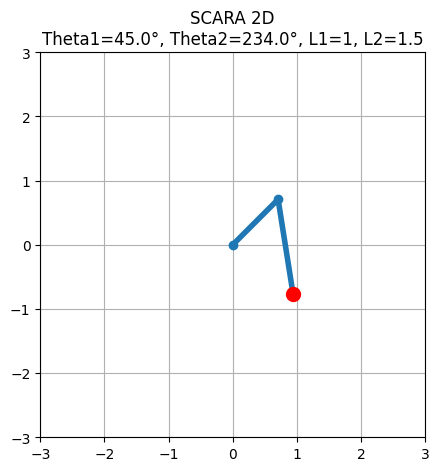

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# ==== AQUÍ CAMBIA LOS VALORES ====
theta1 = 45   # grados
theta2 = 234   # grados
L1 = 1        # longitud del primer brazo
L2 = 1.5        # longitud del segundo brazo
# ================================

# Cinemática directa simple
theta1_rad = np.deg2rad(theta1)
theta2_rad = np.deg2rad(theta2)

# Primer punto (articulación 1)
x1 = L1 * np.cos(theta1_rad)
y1 = L1 * np.sin(theta1_rad)

# Segundo punto (efector final)
x2 = x1 + L2 * np.cos(theta1_rad + theta2_rad)
y2 = y1 + L2 * np.sin(theta1_rad + theta2_rad)

# Graficar
plt.figure(figsize=(5,5))
plt.plot([0, x1, x2], [0, y1, y2], 'o-', lw=4)
plt.plot(x2, y2, 'ro', markersize=10)
plt.xlim(-L1-L2-0.5, L1+L2+0.5)
plt.ylim(-L1-L2-0.5, L1+L2+0.5)
plt.gca().set_aspect('equal')
plt.title(f"SCARA 2D\nTheta1={theta1:.1f}°, Theta2={theta2:.1f}°, L1={L1}, L2={L2}")
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

def scara_plot(theta1, theta2, L1, L2):
    # Convertir a radianes
    theta1_rad = np.deg2rad(theta1)
    theta2_rad = np.deg2rad(theta2)

    # Cinemática directa
    x1 = L1 * np.cos(theta1_rad)
    y1 = L1 * np.sin(theta1_rad)

    x2 = x1 + L2 * np.cos(theta1_rad + theta2_rad)
    y2 = y1 + L2 * np.sin(theta1_rad + theta2_rad)

    # Graficar
    plt.figure(figsize=(5,5))
    plt.plot([0, x1, x2], [0, y1, y2], 'o-', lw=4)
    plt.plot(x2, y2, 'ro', markersize=10)
    plt.xlim(-L1-L2-0.5, L1+L2+0.5)
    plt.ylim(-L1-L2-0.5, L1+L2+0.5)
    plt.gca().set_aspect('equal')
    plt.title(f"SCARA 2D\nTheta1={theta1:.1f}°, Theta2={theta2:.1f}°, L1={L1}, L2={L2}")
    plt.grid(True)
    plt.show()

# Crear sliders interactivos
interact(
    scara_plot,
    theta1=widgets.FloatSlider(value=45, min=-180, max=180, step=1, description="Theta1 (°)"),
    theta2=widgets.FloatSlider(value=234, min=-180, max=180, step=1, description="Theta2 (°)"),
    L1=widgets.FloatSlider(value=1.0, min=0.1, max=3.0, step=0.1, description="L1 (m)"),
    L2=widgets.FloatSlider(value=1.5, min=0.1, max=3.0, step=0.1, description="L2 (m)")
)


# Encontremos el espacio de trabajo del robot

## WARNING NO CORRER ESTO PORQUE ESTA DEMORANDO MUCHO EN CREAR EL ARRAY

In [ ]:
theta1, theta2 = dynamicsymbols('theta1 theta2') # q1 y q2
L1, L2 = symbols('L1 L2') # a1 y a2

def scara2d(tet1, tet2, l1, l2):
    N = ReferenceFrame('N')
    A = N.orientnew('A', 'Axis', [theta1, N.z])
    B = A.orientnew('B', 'Axis', [theta2, A.z]) # Note que B lo definimos con respecto a A así no hay que pensar B en terminos de B
    O = Point('O')
    P1 = O.locatenew('P1', L1 * A.x) # Existe un P1 en L1  por A_x
    P2 = P1.locatenew('P2', L2 * B.x) # Existe un P2 en L2 con respecto a B_x
    vector_pos_efector = P2.pos_from(O).express(N).simplify()

    valores = {
        theta1: rad(tet1),
        theta2: rad(tet2),
        L1: l1,
        L2: l2
    
    }
    vector_numerico = vector_pos_efector.subs(valores).evalf()
    x = vector_numerico.dot(N.x)
    y = vector_numerico.dot(N.y)
    
    return (x,y)

# lista_posiciones = []
#for n in range(0,90, 10):
#    for y in range(0,90,10):
#        x, y = scara2d(n, y, 1, 1)
#        lista_posiciones.append((x,y))
#
#for i, (x, y) in enumerate(lista_posiciones):
#   print(f"Posición numérica del efector {i}:\nx = {x:.4f}\ny = {y:.4f}")

# Crear arrays de ángulos de 0° a 90° con paso de 1°
theta1_vals = np.arange(-90, 91, 1)
theta2_vals = np.arange(-90, 91, 1)

# Crear todas las combinaciones posibles de ángulos usando meshgrid
T1, T2 = np.meshgrid(theta1_vals, theta2_vals)

# Aplanar para iterar en un solo for
# T1_flat = T1.ravel()
# T2_flat = T2.ravel()

# Guardar resultados
xs, ys = [], [] 

# for t1, t2 in zip(T1_flat, T2_flat):
    x, y = scara2d(t1, t2, 1, 1)
    xs.append(x)
    ys.append(y)

# Graficar el espacio de trabajo
plt.figure(figsize=(6,6))
plt.scatter(xs, ys, s=5, color="blue")
plt.xlabel("X [m]")
plt.ylabel("Y [m]")
plt.title("Espacio de trabajo SCARA 2D")
plt.axis("equal")
plt.grid(True)
plt.show()

IndentationError: unexpected indent (2008269309.py, line 50)

# Ejemplo en clase

In [ ]:
x, y, theta, r= dynamicsymbols("x y theta r")
t = symbols("t")
N = ReferenceFrame("N")
r1 = 1*N.x + 2*N.y
r2 = 3*N.x + 5*N.y

r1.dot(r2)

# ------------
# N.orientnew?

# A es el marco que vamos a rotar
# A es el nombre del nuevo marco
# Luego va el tipo de rotación
# Y finalmente los ángulos y el eje respecto al que rota

A = N.orientnew('A', 'Axis', [theta, N.z])

P1 = x*N.x + y*N.y
P2 = r*A.x

P2 = P2.express(N)

a = P2.diff(t, N).diff(t,N).express(A).simplify()

# Sustituyendo la aceleración angular por cero
a.subs({theta.diff(t).diff(t) : 0})

a

⎛     2    ⎞                        
⎝- r⋅θ̇  + r̈⎠ a_x + (r⋅θ̈ + 2⋅ṙ⋅θ̇) a_y

In [ ]:
# Matriz de cosenos y vectores
A.dcm(N)

⎡cos(θ)   sin(θ)  0⎤
⎢                  ⎥
⎢-sin(θ)  cos(θ)  0⎥
⎢                  ⎥
⎣   0       0     1⎦